Subsidy Inc. is company which delivers subsidies to individuals based on their income. When Some one new come in its difficult to miantain the data of personal income. Accurate income data is one of the hardest piece of data to obtain across the world.
Classify the income level based on attributes we have for individual level. 

subsidy inc. wishes us to: Develop an income clssifier system for individuals.
 
Simplify the data system by reducing the number of variables to be studied, without sacrificing too much of accuracy. Such a system would help subsidy inc. in planning subsidy outlay, monitoring and preventing misuse.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# To partition the data
from sklearn.model_selection import train_test_split

# Importing library for logistic regression
from sklearn.linear_model import LogisticRegression

# Importing performance metrices - accuracy score and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
data = pd.read_csv("income.csv")

In [3]:
data

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [4]:
df = data.copy() # make copy of original data and carry further analysis on copied data

EDA

In [5]:
df.info() # check the variables data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [6]:
df.isnull().sum() # to check whether data contain the missing value

# we come to know that there is no missing value in any of variables in data set

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [7]:
# To get descriptive statistic of given data

df.describe() # take only numeric data 

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [8]:
# Summary of categorical variables

summary_cate = data.describe(include = "O")
summary_cate

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [9]:
# Frequency of each categories under a particular variable

df['JobType'].value_counts()


 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [10]:
df['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [11]:
# checking unique values
df['JobType'].unique()

array([' Private', ' Federal-gov', ' ?', ' Self-emp-inc',
       ' Self-emp-not-inc', ' Local-gov', ' State-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

In [12]:
print(np.unique(df['JobType']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


In [13]:
print(np.unique(df['occupation']))

[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [14]:
# There exist ' ?' instead of nan. na_value used to create a string which is to be considered as NAN in pandas.
# Here ? will be considered as NAN.

df = pd.read_csv('income.csv', na_values=[' ?'])
df

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


Data Preprocessing

In [15]:
df.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [16]:
missing = df[df.isnull().any(axis=1)]
 
# axis=1 to consider at least one column value is missing in a row

Missing values in jobtype = 1809

Missing values in Occupation = 1816

There are 1809 rows where two specific columns 
i.e. occupation & JobType have missing values

(1816-1809) = 7 => You still have occupation unfilled for these 7 rows. Because, jobtype is Never worked

We can delete the missing data or replace the missing values with reasonable alternatives. If data is not missing at random, we have to model the mechanisms that produce missing values as well as relationship of interest which is very complex in these contex. So here  we are going to remove all the rows with mising values. 

In [17]:
df2 = df.dropna(axis=0)

In [18]:
corr = df.corr(numeric_only=True)
corr

# none of the numeric variable is related to each other. 
# This is identified by analysing corr value. None of the corr value is nearer to 1 i.e greater and equal to 0.6

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.077490,0.057282,0.068299
capitalgain,0.077490,1.000000,-0.031499,0.079112
capitalloss,0.057282,-0.031499,1.000000,0.053106
hoursperweek,0.068299,0.079112,0.053106,1.000000


In [19]:
gender = pd.crosstab(index = df2["gender"], columns  = 'count', normalize = True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [20]:
# Gender vs Salary Status
gender_salstat = pd.crosstab(index = df2["gender"],columns = df2['SalStat'], margins = True, normalize =  'index') 
                 # Include row and column totals
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


In [21]:
df2.dtypes['SalStat']


dtype('O')

In [22]:
print(np.unique(df2['SalStat']))

[' greater than 50,000' ' less than or equal to 50,000']


In classification problem u need to know how balance the class values are. For eg. you need to know the proportion of your output variable.

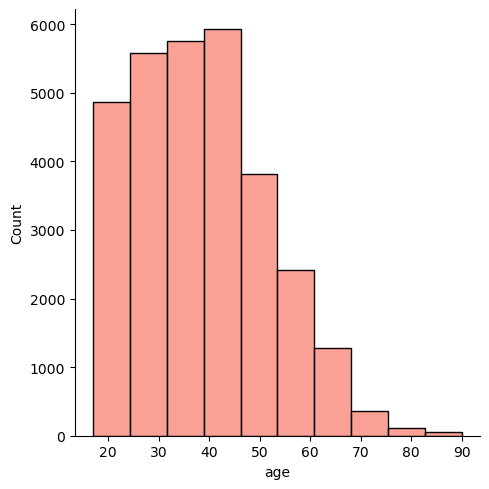

In [23]:
sns.displot(df2['age'], bins=10, kde=False, color = "Salmon")
# People with age 20-45 age are high in frequency

SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

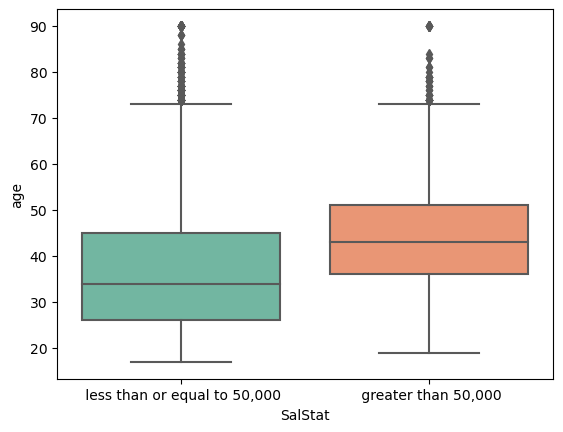

In [24]:
sns.boxplot(x='SalStat', y='age', data=df2,  palette="Set2")
df2.groupby('SalStat')['age'].median()

## people with 35-50 age are more likely to earn > 50000 USD p.a
## people with 25-35 age are more likely to earn <= 50000 USD p.a

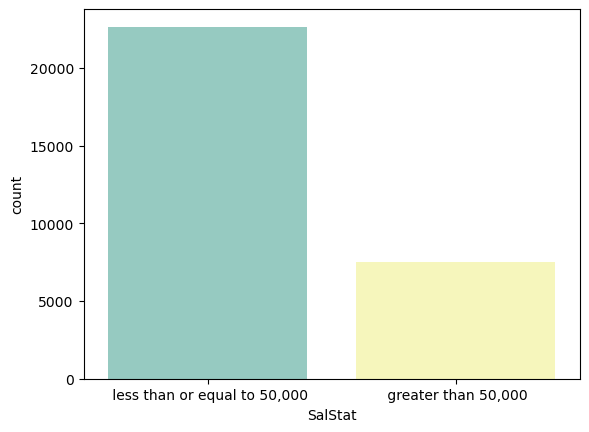

In [25]:
SalStat = sns.countplot(x = 'SalStat', data = df2, palette = "Set3")

# 75 % of people's salary status is <=50,000 
# & 25% of people's salary status is > 50,000

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.7,61.3
Local-gov,29.5,70.5
Private,21.9,78.1
Self-emp-inc,55.9,44.1
Self-emp-not-inc,28.6,71.4
State-gov,26.9,73.1
Without-pay,0.0,100.0
All,24.9,75.1


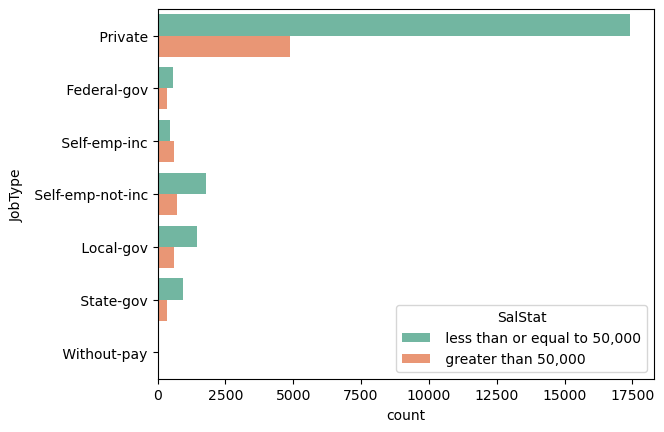

In [26]:
JobType     = sns.countplot(y=df2['JobType'],hue = 'SalStat', data=df2, palette = "Set2")

job_salstat =pd.crosstab(index = df2["JobType"],columns = df2['SalStat'], margins = True, normalize =  'index')  
round(job_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.2,92.8
11th,5.6,94.4
12th,7.7,92.3
1st-4th,4.0,96.0
5th-6th,4.2,95.8
7th-8th,6.3,93.7
9th,5.5,94.5
Assoc-acdm,25.4,74.6
Assoc-voc,26.3,73.7


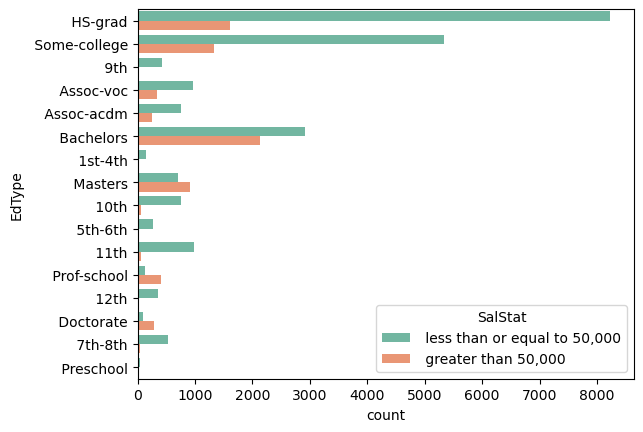

In [27]:
Education   = sns.countplot(y=df2['EdType'],hue = 'SalStat', data=df2, palette = "Set2")

EdType_salstat = pd.crosstab(index = df2["EdType"], columns = df2['SalStat'],margins = True,normalize ='index')  
round(EdType_salstat*100,1)


SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.4,86.6
Armed-Forces,11.1,88.9
Craft-repair,22.5,77.5
Exec-managerial,48.5,51.5
Farming-fishing,11.6,88.4
Handlers-cleaners,6.1,93.9
Machine-op-inspct,12.5,87.5
Other-service,4.1,95.9
Priv-house-serv,0.7,99.3


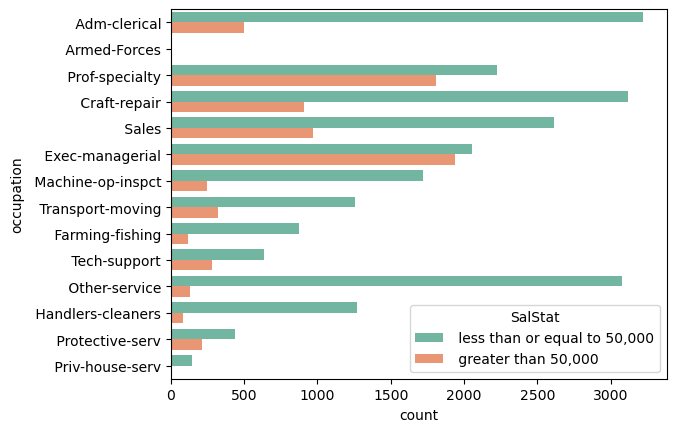

In [28]:
Occupation  = sns.countplot(y=df2['occupation'],hue = 'SalStat', data=df2, palette = "Set2")

occ_salstat = pd.crosstab(index = df2["occupation"], columns =df2['SalStat'],margins = True,normalize = 'index')  
round(occ_salstat*100,1)


<Axes: xlabel='capitalgain', ylabel='Count'>

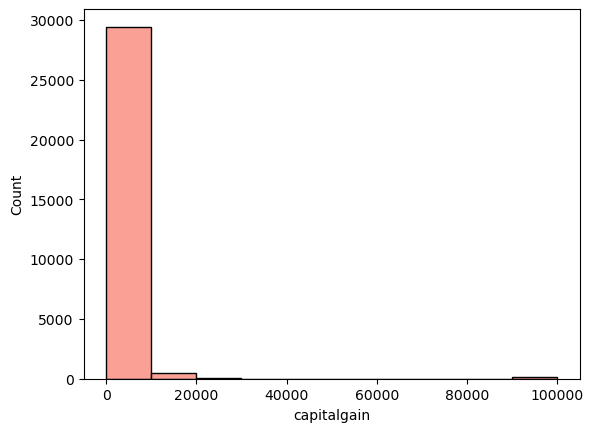

In [29]:
sns.histplot(df2['capitalgain'], bins = 10, kde = False, color = "Salmon")

<Axes: xlabel='capitalloss', ylabel='Count'>

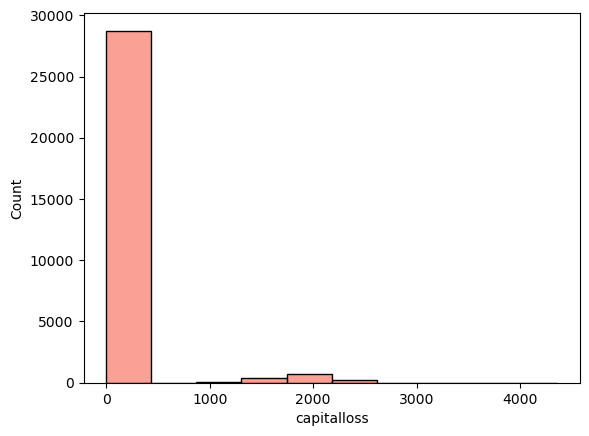

In [30]:
sns.histplot(df2['capitalloss'], bins = 10, kde = False, color = "Salmon")

### Logistic Regression 

Logistic Regression Model is machine learning classification algorithm that is used to predict probability of categorical dependent variable.

Using logistic regression we will build a classify model based on available data. 

In [31]:
# Reindexing the salary status names to 0,1

df2['SalStat']=df2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(df2['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


C:\Users\shrey\AppData\Local\Temp\ipykernel_40856\3706865711.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SalStat']=df2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


In [32]:
new_data=pd.get_dummies(df2, drop_first=True)
# It converts categorical data into dummy or indicator variables.

In [33]:
# Storing the column names 

columns_list=list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [34]:
# Separating the input names from data

features=list(set(columns_list)-set(['SalStat']))
print(features)

['nativecountry_ Hong', 'race_ White', 'nativecountry_ Ecuador', 'nativecountry_ England', 'EdType_ 11th', 'nativecountry_ Mexico', 'relationship_ Unmarried', 'nativecountry_ Outlying-US(Guam-USVI-etc)', 'EdType_ Doctorate', 'nativecountry_ Guatemala', 'nativecountry_ Greece', 'EdType_ Some-college', 'JobType_ Self-emp-inc', 'nativecountry_ Philippines', 'EdType_ 12th', 'nativecountry_ Jamaica', 'occupation_ Transport-moving', 'relationship_ Wife', 'occupation_ Prof-specialty', 'nativecountry_ Thailand', 'occupation_ Other-service', 'nativecountry_ Honduras', 'nativecountry_ Cuba', 'nativecountry_ Iran', 'nativecountry_ Germany', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ 9th', 'nativecountry_ Dominican-Republic', 'nativecountry_ United-States', 'nativecountry_ Holand-Netherlands', 'occupation_ Machine-op-inspct', 'nativecountry_ India', 'nativecountry_ Nicaragua', 'capitalgain', 'occupation_ Craft-repair', 'maritalstatus_ Married-AF-spouse', 'capitalloss'

In [35]:
# Storing the output values in y

y=new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [36]:
# Storing the values from input features

x = new_data[features].values
print(x)

[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


Random_state is used by random number generator, so that each and every time you run this line while sampling same set of sample will be choosen. If you not set random_state = True then different set of samples will be choosen for analysis.

In [37]:
# Splitting the data into train and test

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=0)

In [38]:
# Make an instance of the Model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

logistic = make_pipeline(StandardScaler(), LogisticRegression())

In [39]:
# Fitting the values for x and y

logistic.fit(train_x,train_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [40]:
# Prediction from test data
prediction = logistic.predict(test_x)
print(prediction)


[0 0 0 ... 0 0 0]


Confussion matrix is used to evaluate performance of classification model. It gives you output as number of correct predictions and number of incorrect predictions and it will sum up all the values class wise. Input are actual and predicted values.

In [41]:

# Confusion matrix
confusion_matrix = confusion_matrix(test_y, prediction)
print(confusion_matrix)


[[6318  505]
 [ 916 1310]]


In [42]:
# Calculating the accuracy
accuracy_score=accuracy_score(test_y, prediction)
print(accuracy_score)


0.8429660735992928


In [43]:
# Printing the misclassified values from prediction

print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 1421


 ### LOGISTIC REGRESSION - REMOVING INSIGNIFICANT VARIABLES

In [44]:
data3 = df2.copy()
data3

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,0
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,0
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,0


In [45]:
cols = ['gender','nativecountry','race','JobType']
new_data = data3.drop(cols,axis = 1)

In [46]:
new_data=pd.get_dummies(new_data, drop_first=True)

In [47]:
# Storing the column names 
columns_list2=list(new_data.columns)
print(columns_list2)


['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'relationship_ Other-rel

In [48]:
# Separating the input names from data
features2=list(set(columns_list2)-set(['SalStat']))
print(features2)

['relationship_ Not-in-family', 'EdType_ Masters', 'age', 'EdType_ 11th', 'relationship_ Unmarried', 'occupation_ Exec-managerial', 'EdType_ Doctorate', 'occupation_ Farming-fishing', 'EdType_ 1st-4th', 'maritalstatus_ Widowed', 'occupation_ Sales', 'maritalstatus_ Married-civ-spouse', 'EdType_ Some-college', 'occupation_ Handlers-cleaners', 'relationship_ Own-child', 'occupation_ Tech-support', 'EdType_ 12th', 'hoursperweek', 'maritalstatus_ Never-married', 'occupation_ Transport-moving', 'relationship_ Wife', 'occupation_ Prof-specialty', 'occupation_ Other-service', 'EdType_ HS-grad', 'EdType_ Preschool', 'maritalstatus_ Married-spouse-absent', 'occupation_ Protective-serv', 'occupation_ Priv-house-serv', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ 9th', 'EdType_ Bachelors', 'maritalstatus_ Separated', 'occupation_ Machine-op-inspct', 'capitalgain', 'occupation_ Craft-repair', 'EdType_ 7th-8th', 'maritalstatus_ Married-AF-spouse', 'relationship_ Other-relative', 'capitalloss

In [49]:
# Storing the output values in y

y2=new_data['SalStat'].values
print(y2)


[0 0 1 ... 0 0 0]


In [50]:
# Storing the values from input features

x2 = new_data[features2].values
print(x2)


[[ 1  0 45 ...  0  0  0]
 [ 0  0 24 ...  1  0  0]
 [ 0  0 44 ...  0  0  0]
 ...
 [ 0  0 23 ...  0  0  0]
 [ 0  0 42 ...  0  0  0]
 [ 1  0 29 ...  0  0  0]]


In [51]:
# Splitting the data into train and test

train_x2,test_x2,train_y2,test_y2 = train_test_split(x2,y2,test_size=0.3, random_state=0)

In [52]:
# Make an instance of the Model

logistic2 = LogisticRegression()

In [53]:
# Fitting the values for x and y

logistic2.fit(train_x2,train_y2)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
# Prediction from test data

prediction2 = logistic2.predict(test_x2)

In [55]:
# Printing the misclassified values from prediction

print('Misclassified samples: %d' % (test_y2 != prediction2).sum())

Misclassified samples: 1497
